# A1)
<br>

$\pi(x) = \frac{1} {\pi(1 + x^{2})}$

$g(x) = {\frac {e^{-{\frac {x^{2}}{2}}}}{\sqrt {2\pi }}}$

$\hat{\theta} = \frac{1}{N}\displaystyle\sum_{t=1}^{N}\frac{h(Z_t)\pi(Z_t)}{g(Z_t)}$

Where $Z_t$ is sampled from Normal Distribution


$Var_g(\hat{\theta}) = Var_g(\frac{1}{N}\displaystyle\sum_{t=1}^{N}\frac{h(Z_t)\pi(Z_t)}{g(Z_t)}) = \frac{\sigma_g^{2}}{N}$

In [2]:
using Distributions
using Plots
using StatsPlots
using Statistics
using Random

In [3]:
Random.seed!(1234)

TaskLocalRNG()

In [4]:
n=10000
d = Normal(0,1)


Normal{Float64}(μ=0.0, σ=1.0)

In [5]:
r = 3000
ests = zeros(r)
func = zeros(n)
for j in 1:r
    normal_samp = rand(d,n)
    for i in 1:n
        func[i] = normal_samp[i] * pdf(Cauchy(0,1),normal_samp[i])/pdf(Normal(0,1),normal_samp[i])
    end
    ests[j] = mean(func)
end

In [6]:
ests


3000-element Vector{Float64}:
 -0.05556212474424576
 -0.08333581853114896
 -0.04839466496270646
 -0.573047499172215
  0.8024979892313788
 -0.08968679945273478
  3.3629701100140403
  0.03938560424375752
 -0.0949134128139621
 -0.2973186984937293
  0.10919333627426049
 -0.0803576951356629
 -1.835544478080542
  ⋮
  0.010943582213237948
  0.46615264676291146
  0.01374187509320667
  0.07919951842038078
 -0.1526626658893283
 -0.010614399565765632
  0.6895079895637157
 -0.0881754863992326
 -0.3865330088931471
  0.008013986252323597
  0.2400294037257458
 -0.060042955368734496

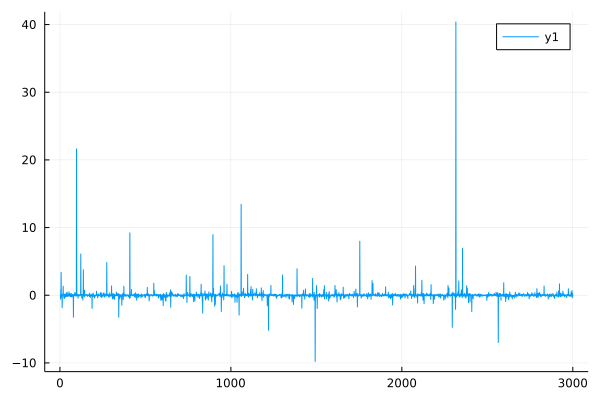

In [7]:
plot(ests)


In [8]:
var(ests)

1.0778274229244111

In [9]:
n*var(ests)

10778.27422924411

Variance blows up.

# A2

Weighted variance = $Var_g[\hat{\theta}] = \sigma_g^{2}\left(1+\frac{Var_g(w(Z))}{[E_g(w(Z))]^{2}}\right) = \sigma_g^{2}\left(1+\frac{[E_g(w(Z)^{2})]-[E_g(w(Z))]^{2}}{[E_g(w(Z))]^{2}}\right) = \sigma_g^{2}\left(\frac{[E_g(w(Z)^{2})]}{[E_g(w(Z))]^{2}}\right) $

$\sigma_g^{2}$ is given to be finite. But we cannot say for sure $\left(\frac{[E_g(w(Z)^{2})]}{[E_g(w(Z))]^{2}}\right) $ will be finite. So we cannot say if weighted variance is going to be finite or not.


# A3

In [10]:
function pi_samples(x,v)
    y = zeros(50)
    product = 1
    for i in 1:50
        y[i] = rand(TDist(v))
        product=product*((1+(y[i]-x)^2)^((v+1)/2))
    end
    return product
end

pi_samples (generic function with 1 method)

$\hat{\theta}:= \frac{\displaystyle\sum_{t=1}^{N}\frac{h(Z_t)\tilde{\pi}(Z_t)}{\tilde{g}(Z_t)}}{\displaystyle\sum_{t=1}^{N}\frac{\tilde{\pi}(Z_t)}{\tilde{g}(Z_t)}}$

In [11]:
function Weighted_Importance_Samples(n,v)
    numerator = zeros(n) 
    denominator = zeros(n)
    Z=rand(Normal(0,1),n)
    for i in 1:n
        numerator[i] = Z[i] * pi_samples(Z[i],v)/pdf(Normal(0,1),Z[i])
        denominator[i] = pi_samples(Z[i],v)/pdf(Normal(0,1),Z[i])
    end
    num_sum = sum(numerator)
    den_sum = sum(denominator)
    return num_sum/den_sum
end

Weighted_Importance_Samples (generic function with 1 method)

In [12]:
r=1000
theta=zeros(r)
for i in 1:r
    theta[i] = Weighted_Importance_Samples(10000,5)
end
var(theta) 

4.212822012373061e39

# A4

Given $Y_1,Y_2...Y_n \sim Poisson(\lambda)$ and $\lambda \sim Gamma(\alpha,\beta)$

$P(\lambda|Y) = P(\lambda).\prod f(Y|\lambda) = \frac{1}{\Gamma(\alpha)}.\lambda^{\alpha-1}\beta^{-\alpha}exp(\frac{-\lambda}{\beta}).\displaystyle\prod_{i=1}^{n} \frac{\lambda^{y_i}e^{-\lambda}}{y_i!}$

$P(\lambda|Y) \propto \lambda^{\alpha -1 + \sum y_i}.exp(-\frac{\lambda}{\beta}-n\lambda)$

Clearly the posterior distribution is a Gamma Distribution

$P(\lambda|Y) \sim Gamma(\alpha+\sum y_i,\frac{1}{\beta}+n)$